# Dask for Big Data: 2024 India Election Ad Spend on Meta (Facebook & Instagram)

During the 2024 Indian elections, Facebook and Instagram were flooded with political ads from major parties like the BJP and INC. These parties invest substantial amounts in digital advertising to engage voters and shape public opinion. Let's explore how much money was spent on election campaigns across different states and understand the impact of this spending on the digital landscape.

## Setting Up the Environment for Data Analysis and Visualization

To begin our analysis, we'll import essential Python libraries. These include NumPy and pandas for data manipulation, Matplotlib and Seaborn for data visualization, and a warnings filter to keep our environment clean.

In [41]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=ImportWarning)

## Loading and Preparing Data from CSV Files

In [3]:
results = dd.read_csv(r"C:\Users\srava\Desktop\excel csv files\Results.csv",assume_missing=True)
locations = dd.read_csv(r"C:\Users\srava\Desktop\excel csv files\Locations.csv",assume_missing=True)
advertisers = dd.read_csv(r"C:\Users\srava\Desktop\excel csv files\Advertiser.csv",encoding="ISO-8859-1",dtype={'Amount spent (INR)':'object'},assume_missing=True)

In [4]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1.0,1.0,Andaman and Nicobar Islands,Andaman & Nicobar Islands,315148.0,64.10,202018.0,1.0
1,2.0,2.0,Arunachal Pradesh,Arunachal East,375310.0,83.31,312658.0,1.0
2,3.0,3.0,Arunachal Pradesh,Arunachal West,517384.0,73.60,380783.0,1.0
3,4.0,4.0,Assam,Dibrugarh,1659588.0,76.75,1273744.0,1.0
4,5.0,5.0,Assam,Jorhat,1727121.0,79.89,1379749.0,1.0


In [5]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858.0
1,Andhra Pradesh,100819732.0
2,Arunachal Pradesh,1385654.0
3,Assam,17478091.0
4,Bihar,53619242.0


In [6]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,1.210000e+14,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455.0
1,3.520000e+14,Indian National Congress,Indian National Congress,108787100,846.0
2,1.330000e+14,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799.0
3,1.930000e+14,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680.0
4,1.090000e+14,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879.0


## Data Cleaning and Merging for Analysis
This code snippet cleans and merges two datasets ("results" and "locations") based on state names for subsequent analysis. It standardizes state names by stripping whitespace and converting to lowercase before merging, ensuring compatibility between datasets.

In [9]:
results["State"] = results["State"].str.strip().str.lower()
locations["Location name"] = locations["Location name"].str.strip().str.lower()
merge = results.merge(right=locations,how="left",left_on="State",right_on="Location name")
merge.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1.0,1.0,andaman and nicobar islands,Andaman & Nicobar Islands,315148.0,64.10,202018.0,1.0,andaman and nicobar islands,377858.0
1,2.0,2.0,arunachal pradesh,Arunachal East,375310.0,83.31,312658.0,1.0,<NA>,NaN
2,3.0,3.0,arunachal pradesh,Arunachal West,517384.0,73.60,380783.0,1.0,arunachal pradesh,1385654.0
3,4.0,4.0,assam,Dibrugarh,1659588.0,76.75,1273744.0,1.0,assam,17478091.0
4,5.0,5.0,assam,Jorhat,1727121.0,79.89,1379749.0,1.0,assam,17478091.0


## Visualizing Statewise Ad Spending

C:\Users\srava\AppData\Local\Temp\ipykernel_11456\3852576928.py:12: UserWarning:

) missing from font(s) DejaVu Sans.

C:\Users\srava\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning:

) missing from font(s) DejaVu Sans.

C:\Users\srava\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

) missing from font(s) DejaVu Sans.



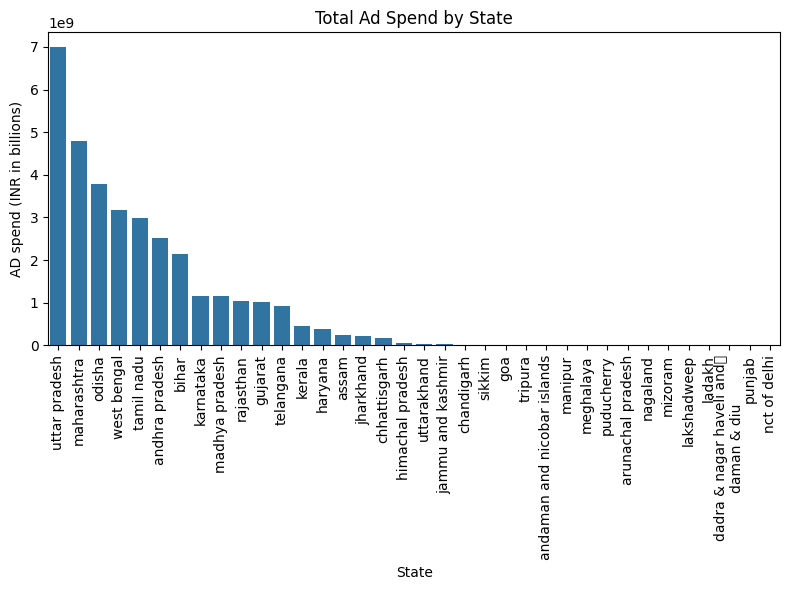

In [57]:
#Group and aggregate (returns a Dask DataFrame)
state_ad_spend_ddf = merge.groupby("State")["Amount spent (INR)"].sum()
# Convert to Pandas and sort
state_ad_spend = state_ad_spend_ddf.compute().sort_values(ascending=False).reset_index()
#Plotting using Seaborn and Matplotlib
plt.figure(figsize=(8,6))
sns.barplot(data= state_ad_spend,x= "State",y= "Amount spent (INR)")
plt.title("Total Ad Spend by State")
plt.xlabel("State")
plt.ylabel("AD spend (INR in billions)")
plt.xticks(rotation=90)
plt.tight_layout()

The bar graph shows the total ad spend (in INR) by state. Uttar Pradesh leads significantly with the highest ad spend, followed by Maharashtra and Odisha. States like West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar also show substantial ad expenditures. In contrast, states such as Lakshadweep, Dadra & Nagar Haveli, Daman & Diu, Andaman & Nicobar Islands, and Arunachal Pradesh have the lowest ad spend.

It indicates that larger and more populous states tend to spend more on ads, likely reflecting their greater political significance and larger voter base.

Now, let’s have a look at the average voter turnout by state:

## Visualizing Average Voter Turnout by State

C:\Users\srava\AppData\Local\Temp\ipykernel_11456\1348149488.py:11: UserWarning:

) missing from font(s) DejaVu Sans.

C:\Users\srava\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning:

) missing from font(s) DejaVu Sans.

C:\Users\srava\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

) missing from font(s) DejaVu Sans.



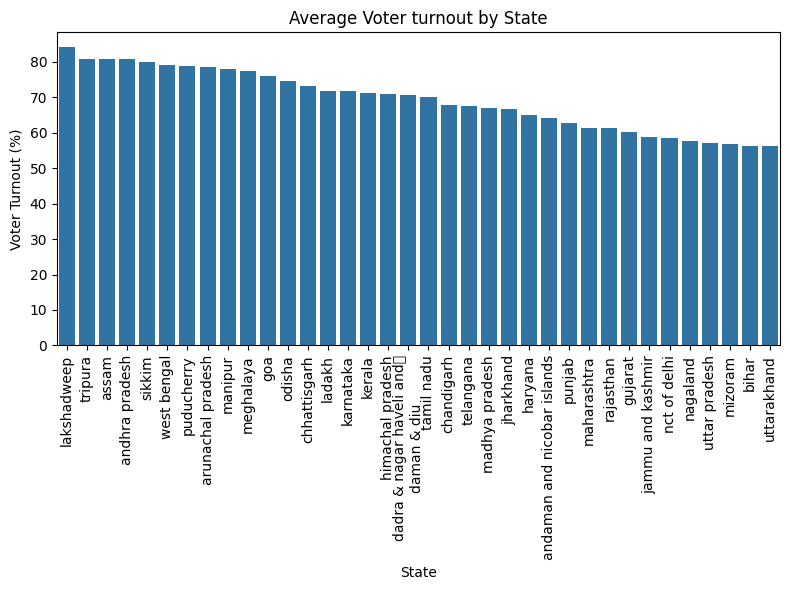

In [58]:
#Group by State and calculate average voter turnout
state_voter_turnout_ddf = results.groupby("State")["Polled (%)"].mean()
#Compute (convert Dask to Pandas), sort and reset index
state_voter_turnout = state_voter_turnout_ddf.compute().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=state_voter_turnout,x="State",y="Polled (%)")
plt.title("Average Voter turnout by State")
plt.xlabel("State")
plt.ylabel("Voter Turnout (%)")
plt.xticks(rotation=90)
plt.tight_layout()

Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-60%.

It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.







Now, let’s have a look at the top 5 parties by ad spend

## Analyzing Top Political Parties by Advertising Expenditure

In [29]:
advertisers["Amount spent (INR)"] = dd.to_numeric(advertisers["Amount spent (INR)"],errors="coerce")
advertisers = advertisers.dropna(subset=["Amount spent (INR)"])

In [31]:
party_ad_spend_ddf = advertisers.groupby("Page name")["Amount spent (INR)"].sum()
party_ad_spend = party_ad_spend_ddf.compute().sort_values(ascending=False).reset_index()

In [35]:
top_5_parties = party_ad_spend.head(5)
top_5_parties

,Page name,Amount spent (INR)
0,Bharatiya Janata Party (BJP),193854342
1,Ama Chinha Sankha Chinha,112412941
2,Indian National Congress,108787100
3,Ellorum Nammudan,23806041
4,BJP Odisha,19573782


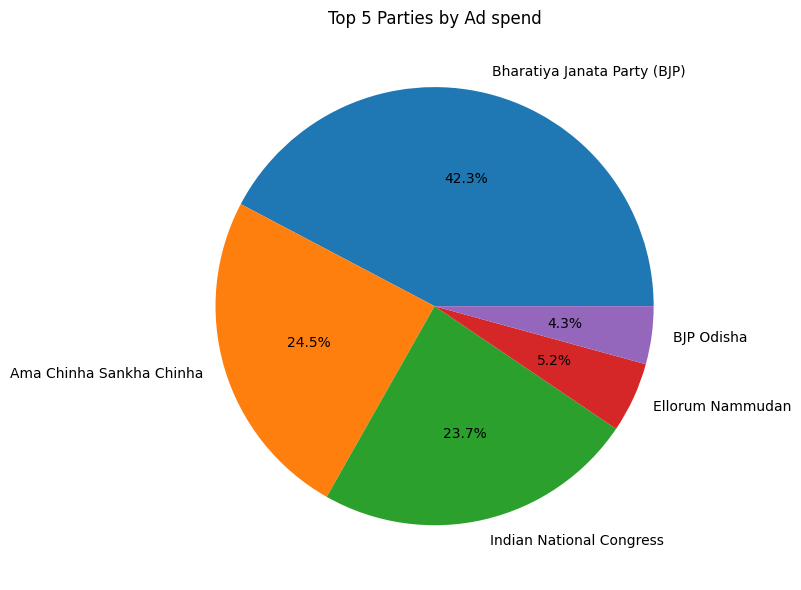

In [36]:
plt.figure(figsize=(8,6))
plt.pie(x=top_5_parties["Amount spent (INR)"],labels=top_5_parties["Page name"],autopct="%1.1f%%")
plt.title("Top 5 Parties by Ad spend")
plt.tight_layout()

The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.







Now, let’s have a look at the correlation between ad spend and voter turnout:

## Analyzing Correlation between Ad Spending and Voter Turnout

In [37]:
correlation = merge[["Amount spent (INR)","Polled (%)"]].compute().corr()
correlation

,Amount spent (INR),Polled (%)
Amount spent (INR),1.000000,-0.000986
Polled (%),-0.000986,1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.009803. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.







Now, let’s have a look at the relationship between ad spend and voter turnout by parliamentary constituency:

## Visualizing Relationship Between Ad Spend and Voter Turnout by Constituency

) missing from font(s) DejaVu Sans.pykernel_11456\1689096785.py:8: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.ms\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.ms\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


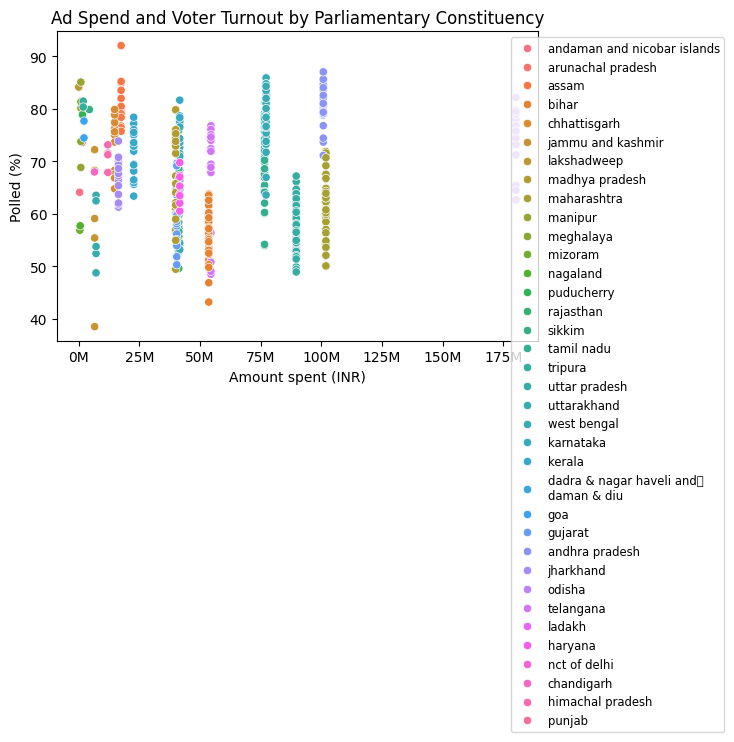

In [42]:
merge_pd = merge.compute()
plt.figure(figsize=(8,6))
sns.scatterplot(data=merge_pd,x="Amount spent (INR)",y="Polled (%)",hue="State")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}M'.format(x/1e6)))
plt.title("Ad Spend and Voter Turnout by Parliamentary Constituency")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), fontsize='small')
plt.tight_layout()

It shows that higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR.

This suggests that other factors such as candidate appeal, campaign effectiveness, voter demographics, and historical voting patterns are likely significant contributors to voter turnout.







Now, let’s have a look at the distribution of ad spending:

## Analyzing Distribution of Ad Spend

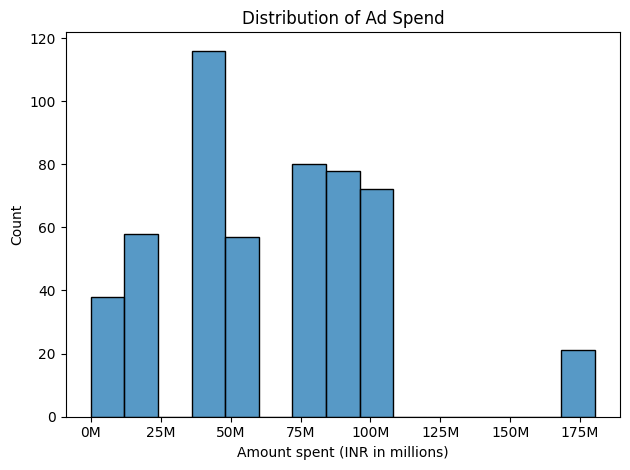

In [52]:
merge_pd = merge.compute()
sns.histplot(data=merge_pd,x="Amount spent (INR)")
ax = plt.gca()  
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.xlabel("Amount spent (INR in millions)")
plt.title("Distribution of Ad Spend")
plt.tight_layout()

The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.







Now, let’s analyze ad spending and voter turnout by election phase:

## Analyzing Ad Spend and Voter Turnout by Election Phase

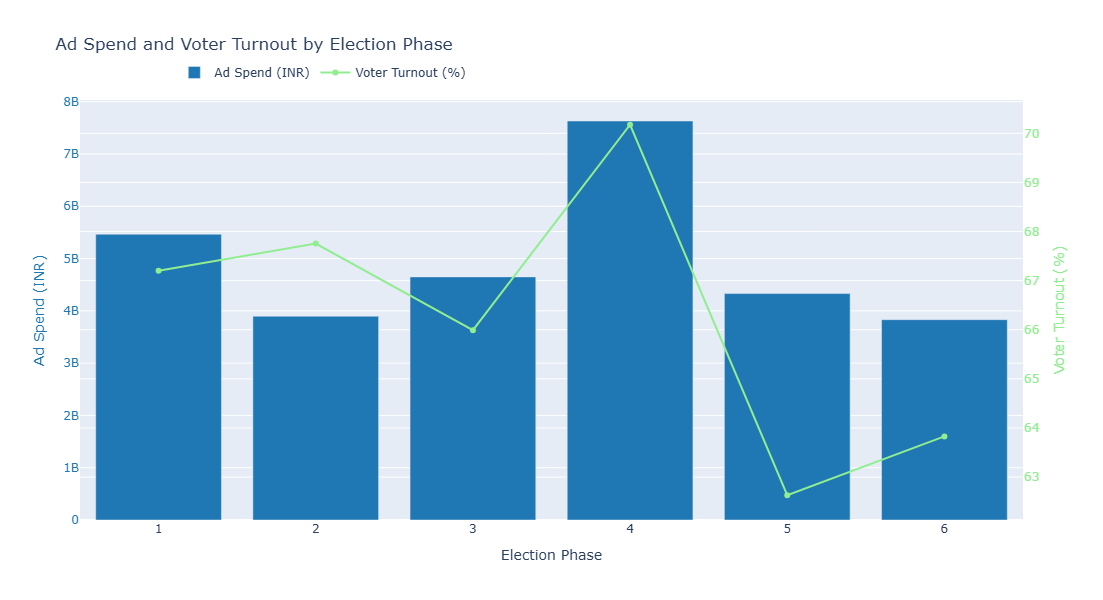

In [54]:
import plotly.graph_objects as go
phase_analysis_dd = merge.groupby('Phase').agg({'Amount spent (INR)': 'sum','Polled (%)': 'mean'})
#Compute result to get a Pandas DataFrame
phase_analysis = phase_analysis_dd.compute().reset_index()
#Plot using Plotly
fig = go.Figure()
# Bar chart: Ad Spend
fig.add_trace(go.Bar(x=phase_analysis['Phase'],y=phase_analysis['Amount spent (INR)'],name='Ad Spend (INR)',marker_color='#1f77b4',yaxis='y1'))
# Line chart: Voter Turnout
fig.add_trace(go.Scatter(x=phase_analysis['Phase'],y=phase_analysis['Polled (%)'],name='Voter Turnout (%)',marker_color='lightgreen',yaxis='y2'))
# Layout with dual Y-axes
fig.update_layout(title='Ad Spend and Voter Turnout by Election Phase',xaxis=dict(title='Election Phase'),
yaxis=dict(title='Ad Spend (INR)',titlefont=dict(color='#1f77b4'),tickfont=dict(color='#1f77b4')),
yaxis2=dict(title='Voter Turnout (%)',titlefont=dict(color='lightgreen'),tickfont=dict(color='lightgreen'),overlaying='y',side='right'),
legend=dict(x=0.1, y=1.1, orientation='h'),width=800,height=600)
fig.show()

There is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.

## Conclusion 

The comprehensive analysis of ad spending and voter turnout across various constituencies indicates that higher advertising expenditure does not necessarily lead to increased voter participation. Despite significant investments, particularly by major parties like the Bharatiya Janata Party (BJP), the correlation between ad spend and voter turnout remains ambiguous. This suggests that while advertising is an essential tool for political campaigns, it is not the sole driver of voter engagement.

## Key Insights

### No Clear Correlation:
Higher ad spending does not consistently result in higher voter turnout, highlighting that voter behavior is influenced by more complex and multifaceted factors than just exposure to political advertisements.

### Role of Larger States:
Larger and more prominent states tend to allocate more resources to advertising. However, this increased spending does not uniformly translate to higher voter turnout, suggesting that regional characteristics and local issues may play more significant roles in driving voter engagement.

### Effectiveness of Ad Spend:
The substantial advertising budgets of political parties like the BJP do not necessarily equate to effective voter mobilization. This raises questions about the efficiency and impact of large-scale ad campaigns on voter behavior.

### Beyond Advertising:
To truly enhance voter turnout, political campaigns need to adopt a more holistic approach that goes beyond advertising. Engaging with voters through grassroots initiatives, addressing local issues, and fostering genuine community connections are critical components that could more effectively increase voter participation.